In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
hsd = fetch_california_housing()

In [2]:
hsd_df = pd.DataFrame(hsd.data, columns = hsd.feature_names)

hsd_df['Price'] = hsd.target
hsd_df = hsd_df.sample(frac=0.2, random_state=200)
hsd_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20523,3.9000,22.0,5.707838,1.023753,1088.0,2.584323,38.51,-121.55,1.469
17655,4.7069,26.0,5.135693,0.952802,1007.0,2.970501,37.25,-121.89,2.348
11334,6.6355,19.0,7.210909,1.029091,1098.0,3.992727,33.75,-117.95,2.761
636,3.3431,10.0,4.595876,1.239175,877.0,1.808247,37.72,-122.16,1.375
14954,4.3750,25.0,6.566667,1.050794,1905.0,3.023810,32.75,-116.98,2.140


<Axes: >

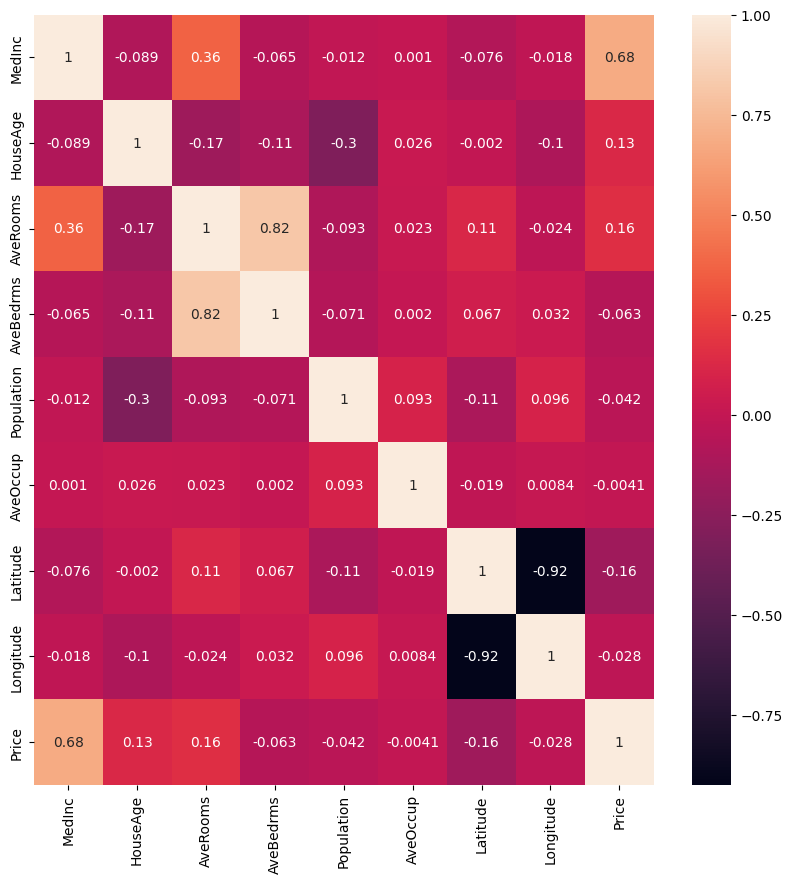

In [3]:
plt.figure(figsize= (10,10))
sns.heatmap(hsd_df.corr(), annot=True)

In [6]:
features = hsd_df.columns[0:9]
target = hsd_df.columns[-1]
X = hsd_df[features].values
Y = hsd_df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 17)
print("The Dimension of X_train is {}".format(X_train.shape))
print("The Dimension of X_test is {}".format(X_test.shape))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The Dimension of X_train is (2889, 9)
The Dimension of X_test is (1239, 9)


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("Model without Regularisation . R^2.................................")
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

ridgeReg = Ridge(alpha=10)
lassoReg = Lasso(alpha=10)
ridgeReg.fit(X_train, y_train)
lassoReg.fit(X_train, y_train)

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("Model with Regularisation . R^2....................................")
print("The train score for lr model is {}".format(train_score_ridge))
print("The test score for lr model is {}".format(test_score_ridge))

Model without Regularisation . R^2.................................
The train score for lr model is 1.0
The test score for lr model is 1.0
Model with Regularisation . R^2....................................
The train score for lr model is 0.999969393543435
The test score for lr model is 0.9994463059710592


<function matplotlib.pyplot.show(close=None, block=None)>

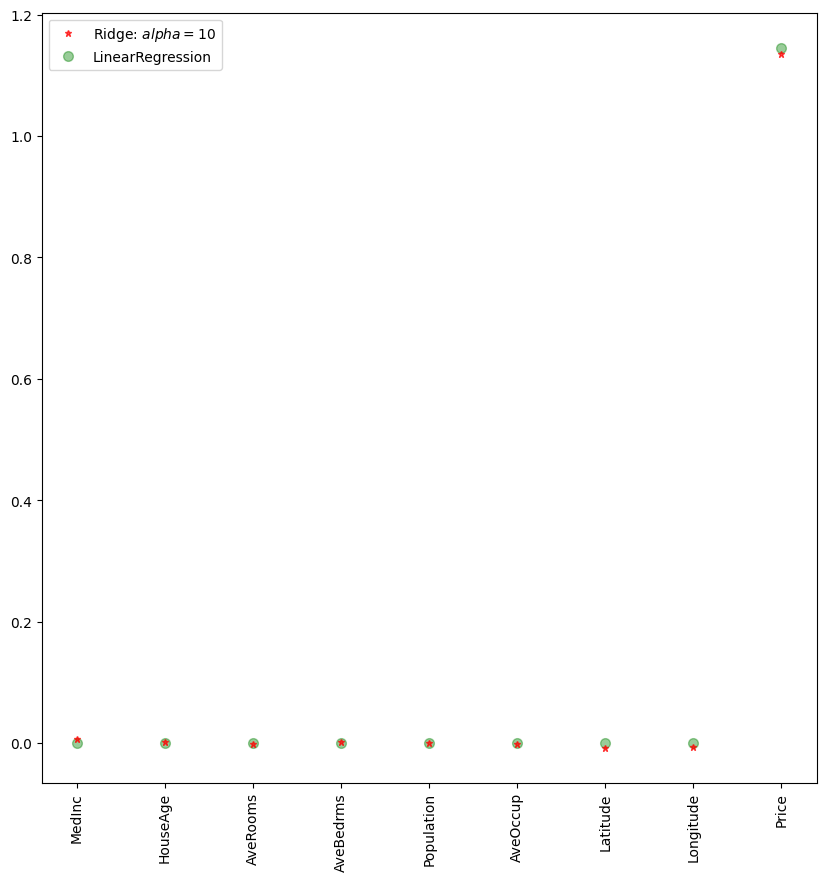

In [28]:
plt.figure(figsize=(10,10))
plt.plot(features,ridgeReg.coef_,alpha=0.7, linestyle='None', marker='*', markersize =5, color ='red', label=r'Ridge: $alpha = 10$', zorder = 7)
plt.plot(features,lr.coef_,alpha=0.4, linestyle='None', marker='o', markersize =7, color = 'green', label = 'LinearRegression')
plt.xticks(rotation=90)
plt.legend()
plt.show

In [29]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], random_state=0).fit(X_train, y_train)
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.9999999923816082
0.9999999923806584


<function matplotlib.pyplot.show(close=None, block=None)>

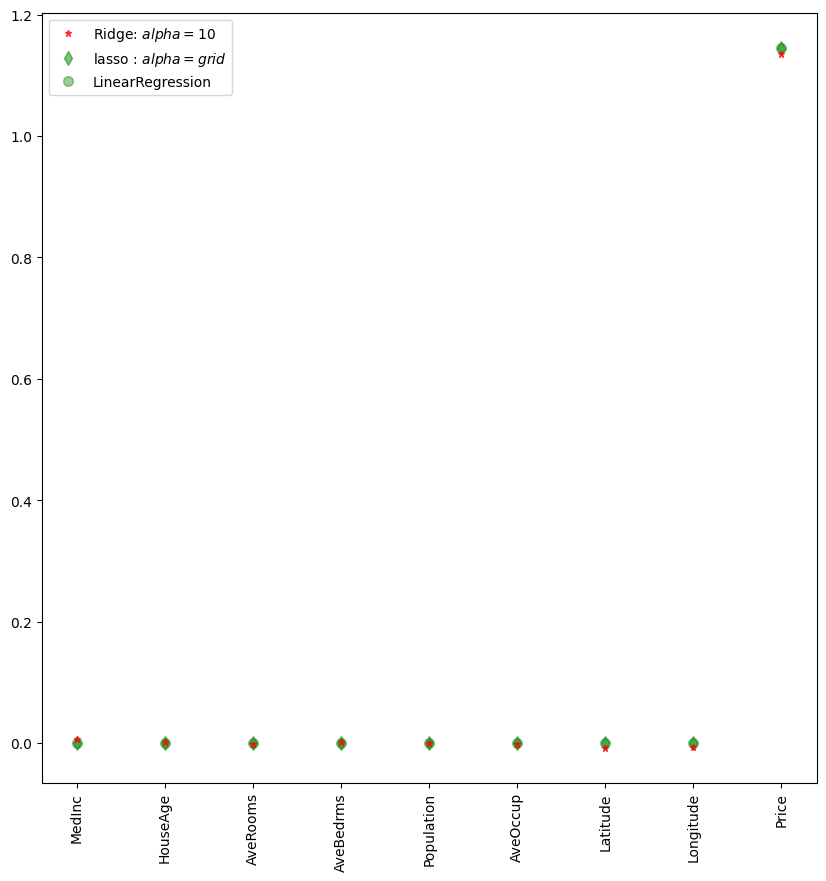

In [33]:
plt.figure(figsize=(10,10))
plt.plot(features,ridgeReg.coef_,alpha=0.7, linestyle='None', marker='*', markersize =5, color ='red', label=r'Ridge: $alpha = 10$', zorder = 7)
plt.plot(lasso_cv.coef_,alpha=0.5, linestyle='None', marker='d', markersize =7, color = 'green', label = r'lasso : $alpha = grid$')
plt.plot(features,lr.coef_,alpha=0.4, linestyle='None', marker='o', markersize =7, color = 'green', label = 'LinearRegression')
plt.xticks(rotation=90)
plt.legend()
plt.show

In [35]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]).fit(X_train, y_train)
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.9999999999999953
0.999999999999976
